#### Ibrahim Johar Farooqi
#### 23K-0074
#### ML - Lab 03 - Tasks

#### task 01

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as ans
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
#loading dataset 1
df1 = pd.read_csv("higher education students performance evaluation.csv")
df1.head()

,STUDENT ID,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   STUDENT ID  145 non-null    object
 1   1           145 non-null    int64 
 2   2           145 non-null    int64 
 3   3           145 non-null    int64 
 4   4           145 non-null    int64 
 5   5           145 non-null    int64 
 6   6           145 non-null    int64 
 7   7           145 non-null    int64 
 8   8           145 non-null    int64 
 9   9           145 non-null    int64 
 10  10          145 non-null    int64 
 11  11          145 non-null    int64 
 12  12          145 non-null    int64 
 13  13          145 non-null    int64 
 14  14          145 non-null    int64 
 15  15          145 non-null    int64 
 16  16          145 non-null    int64 
 17  17          145 non-null    int64 
 18  18          145 non-null    int64 
 19  19          145 non-null    int64 
 20  20        

In [5]:
df1.columns

Index(['STUDENT ID', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', 'COURSE ID', 'GRADE'],
      dtype='object')

In [6]:
print("Shape:", df1.shape)
print("\nColumns:\n", df1.columns.tolist())

Shape: (145, 33)

Columns:
 ['STUDENT ID', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', 'COURSE ID', 'GRADE']


In [7]:
print("\nGRADE - dtype:", df1['GRADE'].dtype)
print("Unique vals (count):", df1['GRADE'].nunique())
print("\nGRADE vals counts:\n", df1['GRADE'].value_counts().sort_index())


GRADE - dtype: int64
Unique vals (count): 8

GRADE vals counts:
 GRADE
0     8
1    35
2    24
3    21
4    10
5    17
6    13
7    17
Name: count, dtype: int64


In [8]:
print("\nGRADE descriptive stats:\n", df1['GRADE'].describe())


GRADE descriptive stats:
 count    145.000000
mean       3.227586
std        2.197678
min        0.000000
25%        1.000000
50%        3.000000
75%        5.000000
max        7.000000
Name: GRADE, dtype: float64


one method to check if we should apply regression or classification (for exam practice reference)

In [10]:
n_unique = df1['GRADE'].nunique()
if n_unique <= 10:
    print("\nDecision hint: GRADE has <= 10 unique values -> treat as CLASSIFICATION (multi-class).")
else:
    print("\nDecision hint: GRADE has > 10 unique values -> might be regression or consider binning for classification.")


Decision hint: GRADE has <= 10 unique values -> treat as CLASSIFICATION (multi-class).


In [29]:
X1 = df1.drop(columns=['STUDENT ID', 'GRADE']).copy()
y1 = df1['GRADE'].copy()

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42, stratify=y1)

print("X1_train:", X1_train.shape, "X1_test:", X1_test.shape)
print("y1_train:", y1_train.shape, "y1_test:", y1_test.shape)

X1_train: (116, 31) X1_test: (29, 31)
y1_train: (116,) y1_test: (29,)


In [ ]:
#dataset1 - entropy w/o pruning
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X1_train, y1_train)

y_train_pred = model.predict(X1_train)
y_test_pred = model.predict(X1_test)

train_acc = accuracy_score(y1_train, y_train_pred)
test_acc  = accuracy_score(y1_test, y_test_pred)

print(f"entropy training acc: {train_acc:.4f}")
print(f"entropy testing acc: {test_acc:.4f}")

entropy training acc: 1.0000
entropy testing  acc: 0.2414


In [35]:
#dataset1 - entropy w/ pruning
model = DecisionTreeClassifier(criterion='entropy', ccp_alpha=0.015)
model.fit(X1_train, y1_train)

y_train_pred = model.predict(X1_train)
y_test_pred = model.predict(X1_test)

train_acc = accuracy_score(y1_train, y_train_pred)
test_acc = accuracy_score(y1_test, y_test_pred)

print(f"entropy training acc w/ pruning: {train_acc:.4f}")
print(f"entropy testing acc w/ pruning: {test_acc:.4f}")

entropy training acc w/ pruning: 1.0000
entropy testing acc w/ pruning: 0.2069


In [ ]:
#dataset1 - gini w/o pruning
model = DecisionTreeClassifier(criterion='gini')
model.fit(X1_train, y1_train)

y_train_pred = model.predict(X1_train)
y_test_pred = model.predict(X1_test)

train_acc = accuracy_score(y1_train, y_train_pred)
test_acc = accuracy_score(y1_test, y_test_pred)

print(f"gini training acc: {train_acc:.4f}")
print(f"gini testing acc: {test_acc:.4f}")

gini training acc: 1.0000
gini testing acc: 0.2414


In [ ]:
#dataset1 - gini w/ pruning
model = DecisionTreeClassifier(criterion='gini', ccp_alpha=0.015)
model.fit(X1_train, y1_train)

y_train_pred = model.predict(X1_train)
y_test_pred = model.predict(X1_test)

train_acc = accuracy_score(y1_train, y_train_pred)
test_acc = accuracy_score(y1_test, y_test_pred)

print(f"gini training acc w/ pruning: {train_acc:.4f}")
print(f"gini testing acc w/ pruning: {test_acc:.4f}")

gini training acc w/ pruning: 0.7845
gini testing acc w/ pruning: 0.2759


In [43]:
#loading dataset 2
df2 = pd.read_csv('breast_cancer_wisconsin_diagnostic.csv')
df2.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [44]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [45]:
df2.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [46]:
print("Shape:", df2.shape)
print("\nColumns:\n", df2.columns.tolist())

Shape: (569, 33)

Columns:
 ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']


In [47]:
df2['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [48]:
df2['diagnosis'] = df2['diagnosis'].astype('category').cat.codes
df2['diagnosis'].unique()

array([1, 0], dtype=int8)

In [ ]:
#(force y2 to be a 1-D Series)
cols_to_drop = [c for c in ['Unnamed: 32', 'id'] if c in df2.columns]
df2_clean = df2.drop(columns=cols_to_drop).copy()

#if object (M/B), convert to numeric category codes
if df2_clean['diagnosis'].dtype == object:
    df2_clean['diagnosis'] = df2_clean['diagnosis'].astype('category').cat.codes

#force y2 as a Series (single bracket)
X2 = df2_clean.drop(columns=['diagnosis'])
y2 = df2_clean['diagnosis'] #1-D Series

print("df2_clean.shape:", df2_clean.shape)
print("X2.shape:", X2.shape, " y2.shape:", y2.shape)
print("y2 dtype:", y2.dtype)
print("y2 unique:", np.unique(y2))

df2_clean.shape: (569, 31)
X2.shape: (569, 30)  y2.shape: (569,)
y2 dtype: int8
y2 unique: [0 1]


In [56]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42, stratify=y2)

print("X2_train:", X2_train.shape, "X2_test:", X2_test.shape)
print("y2_train:", y2_train.shape, "y2_test:", y2_test.shape)

X2_train: (455, 30) X2_test: (114, 30)
y2_train: (455,) y2_test: (114,)


In [57]:
#dataset2 - entropy w/o pruning
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X2_train, y2_train)

y_train_pred = model.predict(X2_train)
y_test_pred = model.predict(X2_test)

train_acc = accuracy_score(y2_train, y_train_pred)
test_acc  = accuracy_score(y2_test, y_test_pred)

print(f"entropy training acc: {train_acc:.4f}")
print(f"entropy testing acc: {test_acc:.4f}")

entropy training acc: 1.0000
entropy testing acc: 0.9474


In [58]:
#dataset2 - entropy w/ pruning
model = DecisionTreeClassifier(criterion='entropy', ccp_alpha=0.015)
model.fit(X2_train, y2_train)

y_train_pred = model.predict(X2_train)
y_test_pred = model.predict(X2_test)

train_acc = accuracy_score(y2_train, y_train_pred)
test_acc  = accuracy_score(y2_test, y_test_pred)

print(f"entropy training acc w/ pruning: {train_acc:.4f}")
print(f"entropy testing acc w/ pruning: {test_acc:.4f}")

entropy training acc w/ pruning: 0.9824
entropy testing acc w/ pruning: 0.9649


In [60]:
#dataset2 - gini w/o pruning
model = DecisionTreeClassifier(criterion='gini')
model.fit(X2_train, y2_train)

y_train_pred = model.predict(X2_train)
y_test_pred = model.predict(X2_test)

train_acc = accuracy_score(y2_train, y_train_pred)
test_acc  = accuracy_score(y2_test, y_test_pred)

print(f"gini training acc w/o pruning: {train_acc:.4f}")
print(f"gini testing acc w/o pruning: {test_acc:.4f}")

gini training acc w/o pruning: 1.0000
gini testing acc w/o pruning: 0.9211


In [61]:
#dataset2 - gini w/ pruning
model = DecisionTreeClassifier(criterion='gini', ccp_alpha=0.015)
model.fit(X2_train, y2_train)

y_train_pred = model.predict(X2_train)
y_test_pred = model.predict(X2_test)

train_acc = accuracy_score(y2_train, y_train_pred)
test_acc  = accuracy_score(y2_test, y_test_pred)

print(f"gini training acc w/ pruning: {train_acc:.4f}")
print(f"gini testing acc w/ pruning: {test_acc:.4f}")

gini training acc w/ pruning: 0.9473
gini testing acc w/ pruning: 0.9298


In [62]:
#corr vs wrong pred(s) for dataset2
model.fit(X2_train, y2_train)
y2_pred = model.predict(X2_test)

corr = (y2_pred == y2_test).sum()
total = len(y2_test)
wrong = total - corr

print(f"wrong pred(s): {wrong}")
print(f"correct pred(s): {corr} out of {total}")

wrong pred(s): 8
correct pred(s): 106 out of 114


df1 | entropy (no prune)
  train acc: 1.0000 | test acc: 0.2414

df1 | entropy (prune)
  train acc: 1.0000 | test acc: 0.2414

df1 | gini (no prune)
  train acc: 1.0000 | test acc: 0.3103

df1 | gini (prune)
  train acc: 0.7845 | test acc: 0.2759

df2 | entropy (no prune)
  train acc: 1.0000 | test acc: 0.9561

df2 | entropy (prune)
  train acc: 0.9824 | test acc: 0.9649

df2 | gini (no prune)
  train acc: 1.0000 | test acc: 0.9298

df2 | gini (prune)
  train acc: 0.9473 | test acc: 0.9298



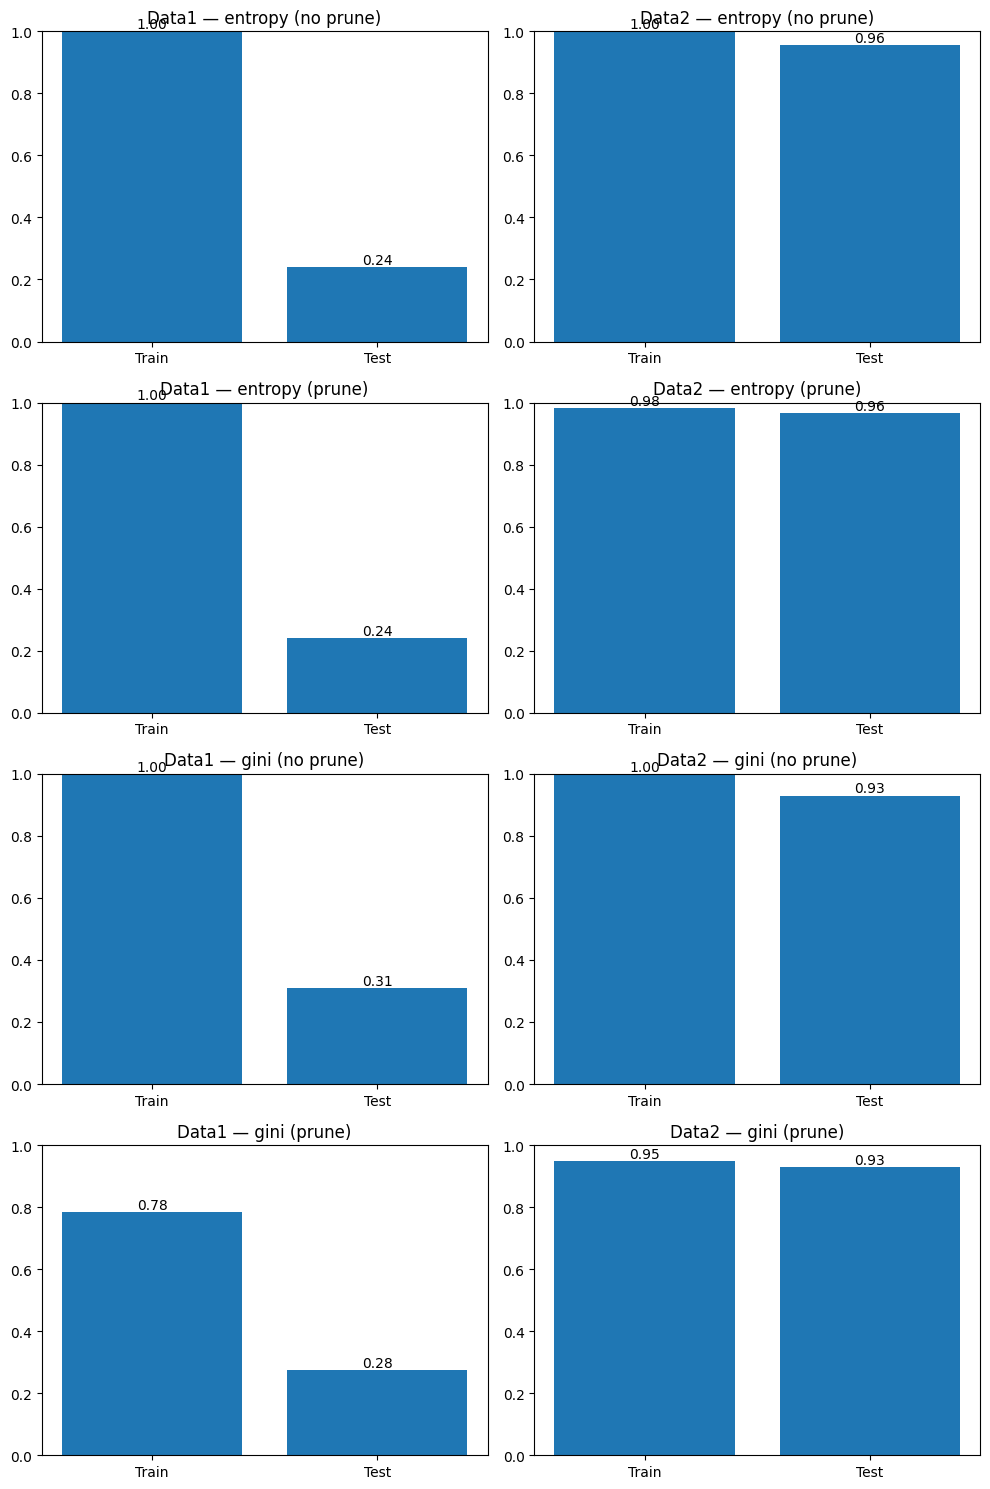

In [66]:
methods = [
    ("entropy (no prune)", DecisionTreeClassifier(criterion="entropy", random_state=42)),
    ("entropy (prune)", DecisionTreeClassifier(criterion="entropy", ccp_alpha=0.015, random_state=42)),
    ("gini (no prune)", DecisionTreeClassifier(criterion="gini", random_state=42)),
    ("gini (prune)", DecisionTreeClassifier(criterion="gini", ccp_alpha=0.015, random_state=42))
]

def run_methods(X_train, X_test, y_train, y_test, dataset_name):
    results = {"labels": [], "train_acc": [], "test_acc": [], "y_test_preds": []}
    
    for label, model in methods:
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        train_acc = accuracy_score(y_train, y_train_pred)
        test_acc = accuracy_score(y_test, y_test_pred)
        
        results["labels"].append(label)
        results["train_acc"].append(train_acc)
        results["test_acc"].append(test_acc)
        results["y_test_preds"].append(y_test_pred)
        
        print(f"{dataset_name} | {label}")
        print(f"  train acc: {train_acc:.4f} | test acc: {test_acc:.4f}\n")
    
    return results

results = {}

results["df1"] = run_methods(X1_train, X1_test, y1_train, y1_test, "df1")
results["df2"] = run_methods(X2_train, X2_test, y2_train, y2_test, "df2")


plt.figure(figsize=(10, 15))

for i in range(len(results["df1"]["labels"])):
    label = results["df1"]["labels"][i]
    
    # Dataset1 values
    t1 = results["df1"]["train_acc"][i]
    s1 = results["df1"]["test_acc"][i]
    # Dataset2 values
    t2 = results["df2"]["train_acc"][i]
    s2 = results["df2"]["test_acc"][i]
    
    # Left subplot = Dataset1
    plt.subplot(4, 2, 2*i + 1)
    bars = plt.bar(["Train", "Test"], [t1, s1])
    plt.ylim(0, 1)
    plt.title(f"Data1 — {label}")
    for b in bars:
        plt.text(b.get_x()+b.get_width()/2, b.get_height()+0.01, f"{b.get_height():.2f}", ha='center')
    
    # Right subplot = Dataset2
    plt.subplot(4, 2, 2*i + 2)
    bars = plt.bar(["Train", "Test"], [t2, s2])
    plt.ylim(0, 1)
    plt.title(f"Data2 — {label}")
    for b in bars:
        plt.text(b.get_x()+b.get_width()/2, b.get_height()+0.01, f"{b.get_height():.2f}", ha='center')

plt.tight_layout()
plt.show()
        